In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
analysis_gene_names = ['PDGFRA', 'PTPRZ1', 'VCAN', 'MBP', 'QKI', 'ENPP2', 'SLC1A2', 'SLC1A3', 'GPM6A']
genes = dict()
for gene_name in analysis_gene_names:
    genes[gene_name] = pd.read_csv('tmp/related_genes_{}.csv'.format(gene_name))
    genes[gene_name]['value'] /= genes[gene_name]['value'].max()
    genes[gene_name]['category'] = gene_name

genes = pd.concat(list(genes.values()))
genes

,index,value,name,category
0,6429,1.000000,KCNIP4,PDGFRA
1,15794,0.808847,MALAT1,PDGFRA
2,10961,0.804236,LHFPL3,PDGFRA
3,15278,0.478197,LRRC4C,PDGFRA
4,11485,0.463631,CSMD1,PDGFRA
...,...,...,...,...
29115,10727,-0.109357,GRM3,GPM6A
29116,23067,-0.113639,MSI2,GPM6A
29117,14604,-0.121666,ABLIM1,GPM6A
29118,23665,-0.192606,DTNA,GPM6A


In [3]:
TF = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_TF', sep='\t', index_col=0)
TF_cofactors = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_TF_cofactors', sep='\t', index_col=0)
RBP = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_RBP', sep='\t', index_col=0, header=None)

In [4]:
TF, TF_cofactors, RBP = TF['Symbol'].unique(), TF_cofactors['Symbol'].unique(), RBP[1].unique()
gene_names = set(TF) | set(TF_cofactors) | set(RBP)

/tmp/ipykernel_277581/1897017937.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  _genes = _genes.loc[_gene_names]
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/seaborn/matrix.py:1221: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


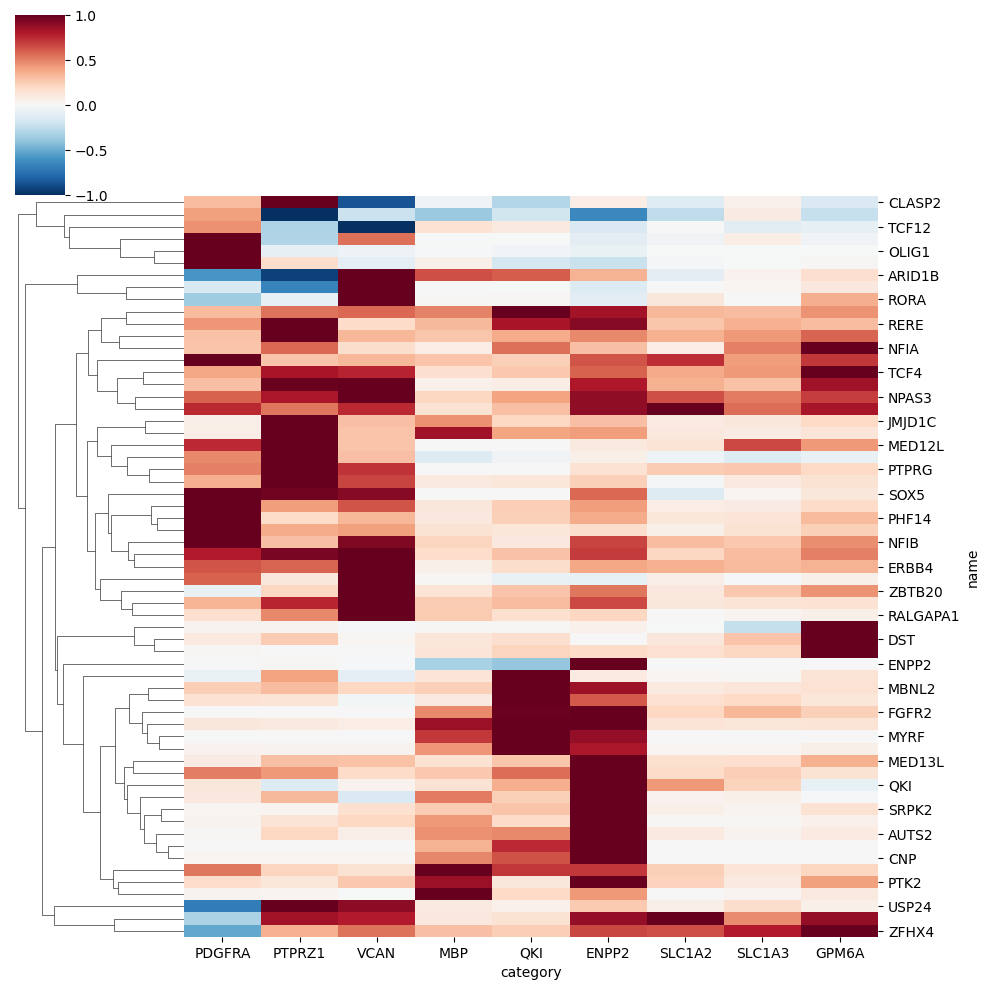

In [5]:
_genes = pd.pivot(genes[genes['name'].isin(gene_names)], index='name', columns='category', values='value')
_gene_names = set()
for gene_name in analysis_gene_names:
    _gene_names = _gene_names | set(_genes.nlargest(20, gene_name).index)
_genes = _genes.loc[_gene_names]
_genes = _genes.div(_genes.abs().max(axis=1), axis=0)

_genes = _genes[analysis_gene_names]
sns.clustermap(data=_genes, square=True, cmap='RdBu_r', center=0, col_cluster=False)
plt.savefig(
    '/lmh_data/work/SEE/analyse/figure_file/differential related genes(ALL).pdf', format='pdf', bbox_inches='tight')
plt.show()

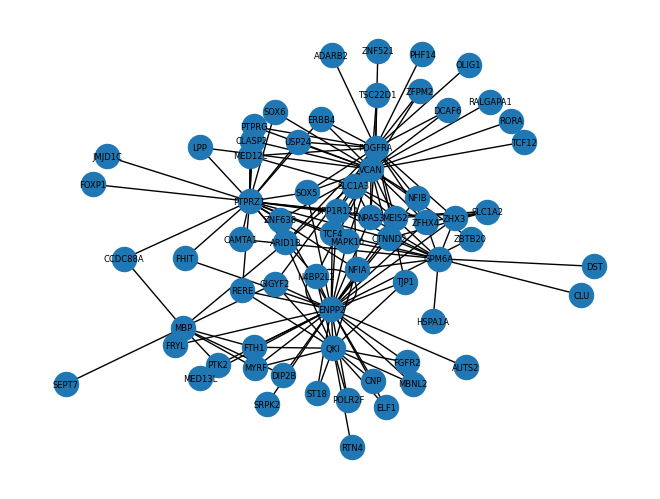

In [6]:
G = nx.Graph()

G.add_weighted_edges_from(
    [(target_gene, related_gene, abs(_genes.loc[related_gene, target_gene]))
     for target_gene in _genes.columns
     for related_gene in _genes.index
     if abs(_genes.loc[related_gene, target_gene]) > 0.5]
)

nx.draw(G, with_labels = True, font_size = 6)
plt.savefig('/lmh_data/work/SEE/analyse/figure_file/related genes network.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [7]:
# %matplotlib notebook
# from netgraph import Graph, InteractiveGraph, EditableGraph


# plot_instance = EditableGraph(G)
# plt.show()